<h1 style="color:#00337C;">SeyedMahdi HajiSeyedHossein - 810100118</h1>

<h1 style="color:#00337C;">Portfolio optimization using Genetic Algorithm</h1>
<h3 style="color:#1C82AD;">Project Goal : Return an efficient way to manage our Portfolio to have the best return and minimum risk </h3>

<pre style="color:#03C988;">This optimization was based on Gentic algorithm (GA) . Inspiration of GA was based on human Gene and its Chromosome <br>
Let’s say we have selected N financial assets we want to invest in. They can be stock, funds, bonds, ETF etc. Each one of them has many historical returns, that is the price relative difference from one period to another. Periods can be days, weeks, months and so on. Build an investment portfolio with a mix of many assets (They can be stock, funds, bonds, ETF) together allocating a fraction x of total capital to each one of them. Each fraction is called weight. The goal of portfolio optimization is to find the values of the weights that Maximize returns and minimize risk simultaneously of our portfolio under some constraints.</pre>

In [1257]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

<h3 style="color:#1C82AD;">Part #1 :</h3>

<pre style="color:#03C988;">Definition of Gene: A fraction of the total capital assigned to a stock. we can name it as WEIGTH</pre>

In [1258]:
gene = np.random.rand()

In [1259]:
gene

0.8937417814405998

<pre style="color:#03C988;">Definition of Chromosome (1D Array): Set of genes fractions of total capital assigned to each stock</pre>

<pre style="color:#03C988;">Sum of a chromosome must be 1 . how to do this :<br>
generate all random number and then calculate --sum of all genes in a choromosome-- and then divide it by this factor</pre>

In [1260]:
class choromosome :
    def __init__ (self , numOfGenes = 400):
        if isinstance(numOfGenes , np.ndarray):
            self.genes = numOfGenes 
            self.genes = self.genes / self.genes.sum()
            
        if isinstance(numOfGenes , int):
            self.genes = np.random.rand(numOfGenes)
            self.genes = self.genes / self.genes.sum()
            
            
    def mutation(self):
        prob = 0.1 
        for i in range(numberOfStocks):
            chance = random.random()
            if chance < prob :
                new_value = random.random()
                self.genes[i] = new_value
                
        self.genes = self.genes / self.genes.sum()
            
            
            
    def returnValue (self , df):
        return (sum(self.genes * df['return']))
    def riskValue (self , df):
        return (sum(self.genes * df['risk']))

In [1261]:
c = choromosome(50)

In [1262]:
c.genes

array([0.03075926, 0.0247469 , 0.00212304, 0.0364414 , 0.02582038,
       0.01969058, 0.03414237, 0.03288156, 0.0294433 , 0.03546484,
       0.02732815, 0.02883195, 0.00651184, 0.03696165, 0.03694265,
       0.02107927, 0.02403564, 0.03187676, 0.00030521, 0.02667369,
       0.01104157, 0.01217168, 0.01633029, 0.00484785, 0.01044904,
       0.01496744, 0.00909048, 0.00491511, 0.02702998, 0.01327191,
       0.01821683, 0.03760721, 0.03293568, 0.03086102, 0.00838169,
       0.00265038, 0.03191489, 0.01063442, 0.0053089 , 0.01253567,
       0.02645   , 0.01467481, 0.01940547, 0.01677629, 0.00107536,
       0.00941635, 0.02456618, 0.00724922, 0.01960971, 0.03355411])

In [1263]:
sum(c.genes)

1.0000000000000002

<h3 style="color:#1C82AD;">Loading DF :</h3>

<pre style="color:#03C988;">This DF is based on 2020 til 2022 real stocks and financial budget and their return and risk </pre>

In [1264]:
df = pd.read_csv('/Users/Mahdi/Desktop/AI/CA/2/Genetic[Test]/sample.csv')

In [1265]:
numberOfStocks = len(df)

In [1266]:
numberOfStocks

400

<h3 style="color:#1C82AD;">Part #2 :</h3>

<pre style="color:#03C988;">Generate Initial Population (2D Array): A set of randomly generated chromosomes</pre>

In [1267]:
initialPopulationSize = 100

In [1268]:
population = []
population.append( np.array([choromosome() for i in range(initialPopulationSize)]) )

In [1269]:
def is_goal(ch):
    
    total_return = ch.returnValue(df)
    total_risk = ch.riskValue(df)

    if total_risk <= 60/100:
        if total_return >= 1000/100:
            print("WE FOUND THE ANSWER")
            print("Total Return: ", total_return)
            print("Total Risk: ", total_risk)
            print("Portfolio is: " , ch.genes)
            return True
    return False 

<h3 style="color:#1C82AD;">Part #3 :</h3>

<pre style="color:#03C988;">For the fitness function I consider this :</pre>

<pre style="color:#03C988;">                   Summation of W(i) * Return(i) - W(i) * Risk(i)</pre>

In [1270]:
def fitnessFunction (ch):
    fitnessValue =  (7 * ch.returnValue(df)) / (1 * ch.riskValue(df))
    return fitnessValue

In [1271]:
testChoromosome = choromosome()


In [1272]:
fitnessFunction(testChoromosome )

11.319001965427882

In [1273]:
fitnessValueOfaPopulation = np.vectorize(fitnessFunction)

In [1274]:
fitnessValueOfaPopulation(population[0])

array([10.67231195, 11.92920333, 11.99584972, 11.70292352, 10.15134987,
       11.44702518, 12.67684019, 11.26873912, 11.92055074, 11.7815961 ,
       12.04850486, 10.93429422, 10.99736532, 11.92472725, 12.62377837,
       11.45018904, 10.57414576, 11.18426246, 11.44557824, 11.68632142,
       11.76125381, 10.40262835, 12.03056229, 11.58730793, 11.5352087 ,
       11.90918648, 11.75657109, 10.84277448, 12.38410398, 11.79078438,
       11.2748416 , 10.58466521, 10.72619665, 11.74245412, 11.46564839,
       11.93592457, 11.72412429, 11.09565157, 11.74120686, 10.82166418,
       11.02382255, 11.46984413, 11.99840214, 11.26473771, 11.41300666,
       11.56169977, 11.51681193, 11.14124539, 10.61440585, 10.84035754,
       11.44975131, 11.96829108, 11.20735217, 11.2210274 , 11.78174027,
       12.18348106, 11.52965731, 10.89746082, 12.77257251, 12.87465561,
       11.48403591, 10.98697064, 11.64994337, 11.29477582, 12.52349661,
       11.31690391, 12.60148824, 10.87702781, 12.04513686, 11.18

<h3 style="color:#1C82AD;">Rank all choromosome for Rank Selection  :</h3>

<pre style="color:#03C988;">In Wheel selection we give each choromosome a chance to be selected by its fitness fuction <br>
but in Rank base selection we assign a chance to each choromosome by its rank :<br>
 In general, if the fitness values are highly variable or if the population is prone to premature convergence, rank-based selection may be a better choice. However, if the fitness values are relatively homogeneous and the population is diverse, roulette wheel selection may be more appropriate.</pre>

In [1275]:
def rankingPopulatoin (population):
    return sorted(population, key=lambda x: fitnessFunction(x), reverse=True)
    

In [1276]:
rankingPopulatoin(population[0])

In [1277]:
fitnessValueOfaPopulation(rankingPopulatoin(population[0]))

array([12.87465561, 12.82867588, 12.77257251, 12.74384807, 12.67684019,
       12.67681179, 12.62377837, 12.60148824, 12.52349661, 12.38410398,
       12.33605571, 12.21707273, 12.18348106, 12.08458339, 12.04850486,
       12.04513686, 12.03056229, 12.02383707, 11.99840214, 11.99584972,
       11.96829108, 11.93592457, 11.92920333, 11.92472725, 11.92055074,
       11.90918648, 11.79078438, 11.78641231, 11.78174027, 11.7815961 ,
       11.76125381, 11.75657109, 11.74245412, 11.74120686, 11.73770137,
       11.72412429, 11.71686223, 11.70292352, 11.69320025, 11.68632142,
       11.64994337, 11.64457051, 11.62835524, 11.61734822, 11.58730793,
       11.56169977, 11.56031726, 11.5352087 , 11.52965731, 11.51681193,
       11.48403591, 11.47470708, 11.46984413, 11.46564839, 11.45018904,
       11.44975131, 11.44702518, 11.44557824, 11.41438106, 11.41300666,
       11.35668146, 11.31690391, 11.29477582, 11.2748416 , 11.26873912,
       11.26473771, 11.2210274 , 11.20735217, 11.18426246, 11.18

In [1278]:
def elitePopulation(generation):
    ten_percent = int(initialPopulationSize* 0.1)

    return generation[:ten_percent]


In [1279]:
fitnessValueOfaPopulation(elitePopulation(population[0]))

array([10.67231195, 11.92920333, 11.99584972, 11.70292352, 10.15134987,
       11.44702518, 12.67684019, 11.26873912, 11.92055074, 11.7815961 ])

<h3 style="color:#1C82AD;">Assign a probility to each choromosome based of their RANK : </h3>

<pre style="color:#03C988;">For each choromosome we assign a chance to it based on its rank like : <br>
    ranked(i) chance calculate like 1/(i+1)</pre>

In [1280]:
def assignCrossoverChance (population):
    crossoverChance = np.array([1/(i+2) for i in range(len(population))])
    crossoverChance = crossoverChance/sum(crossoverChance)
    return crossoverChance

In [1281]:
assignCrossoverChance(population[0])

array([0.11912481, 0.07941654, 0.0595624 , 0.04764992, 0.03970827,
       0.03403566, 0.0297812 , 0.02647218, 0.02382496, 0.02165906,
       0.01985413, 0.01832689, 0.01701783, 0.01588331, 0.0148906 ,
       0.01401468, 0.01323609, 0.01253945, 0.01191248, 0.01134522,
       0.01082953, 0.01035868, 0.00992707, 0.00952998, 0.00916345,
       0.00882406, 0.00850891, 0.0082155 , 0.00794165, 0.00768547,
       0.0074453 , 0.00721969, 0.00700734, 0.00680713, 0.00661804,
       0.00643918, 0.00626973, 0.00610896, 0.00595624, 0.00581097,
       0.00567261, 0.00554069, 0.00541476, 0.00529444, 0.00517934,
       0.00506914, 0.00496353, 0.00486224, 0.00476499, 0.00467156,
       0.00458172, 0.00449528, 0.00441203, 0.00433181, 0.00425446,
       0.00417982, 0.00410775, 0.00403813, 0.00397083, 0.00390573,
       0.00384274, 0.00378174, 0.00372265, 0.00366538, 0.00360984,
       0.00355596, 0.00350367, 0.00345289, 0.00340357, 0.00335563,
       0.00330902, 0.00326369, 0.00321959, 0.00317666, 0.00313

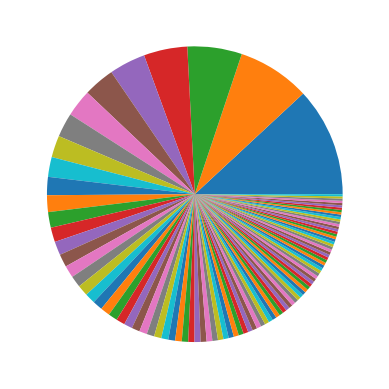

In [1282]:
plt.pie(assignCrossoverChance(population[0]))
plt.show()

<h3 style="color:#1C82AD;">Crossover Base On Each Choromose Fitness : </h3>

In [1283]:
np.random.choice(population[0] , size = 2 , replace = True , p = assignCrossoverChance(population[0]))

array([<__main__.choromosome object at 0x125de6400>,
       <__main__.choromosome object at 0x125de6f70>], dtype=object)

<pre style="color:#03C988;">The above line show how to choose each choromose base on its fitness fuction to choose in a crossover</pre>

In [1284]:
def crossoverProb(prob = 0.8):
    if np.random.random() < prob :
        return True
    return False

<pre style="color:#03C988;">The above line generate a random number to if a crossover OCCURS or not </pre>

In [1285]:
def crossoverBetweenTwoChoromosome (ch1 , ch2):
    if crossoverProb():
        
        #ONE POINT 
#         onePoint = np.random.randint(1 , numberOfStocks)
#         child1 = np.append(ch1.genes[:onePoint] , ch2.genes[onePoint:])
#         child2 = np.append(ch2.genes[:onePoint] , ch1.genes[onePoint:])
        
        
        #N POINT
#         for point in range (numberOfStocks):
#             if np.random.random() < 0.5 :
#                 print(point)
#                 child1 = np.append(ch1.genes[:point] , ch2.genes[point:])
#                 child2 = np.append(ch2.genes[:point] , ch1.genes[point:])
            
#         print(child1)
#         print(child2)
        
        #UNIFORM POINT
    
    
        child1 = np.array([])
        child2 = np.array([])
        
        
        for point in range (numberOfStocks):
            if np.random.random() < 0.5 :
                child1 = np.append(child1 , ch2.genes[point])
                child2 = np.append(child2 , ch1.genes[point])
            else :
                child1 = np.append(child1 , ch1.genes[point])
                child2 = np.append(child2 , ch2.genes[point])
            

    
        
        return (choromosome(child1) , choromosome(child2))
    else :
        return (ch1 , ch2)
        

In [1286]:
def crossoverOnPopulation(mate):
    newGeneration = np.array([])
    
    for i in range(len(mate)) :
        for j in range(i):
            childs = crossoverBetweenTwoChoromosome(mate[i] , mate[j])
            newGeneration = np.append (newGeneration , childs)
    

    return newGeneration.tolist()

In [1287]:
pMutationForCh = 0.1
pMutationGene = 0.1

def mutation(ch):
    if np.random.random() < pMutationForCh :
        copyOfCh = np.array([])
        copyOfCh = np.append(copyOfCh , ch.genes)
        for g in range(numberOfStocks):
            if np.random.random() < pMutationGene :
                copyOfCh[g] = np.random.random()
        return (choromosome(copyOfCh))
    return ch 

In [1288]:
def mutationOnPopulation (thePopulation):
    mutatedGeneration = []
    for man in thePopulation:
        mutatedGeneration.append(mutation(man))
    return mutatedGeneration
        

In [1289]:
def matingPool (pop):
    crossoverWeight =  assignCrossoverChance(pop)
    arr = np.array([])
    arr = np.append( arr , elitePopulation(pop))
    arr = np.append( arr , np.random.choice(pop , size = int(initialPopulationSize/10) , replace = True , p = crossoverWeight))
    return arr

In [1290]:
def goalTest(pop):
    for ch in pop[:10]:
        is_goal(ch)

In [1291]:
len(population)

1

In [1292]:
def genetic (populaionMatrix ):
    numberOfGenerations = 20
    for i in range(numberOfGenerations):
        print('generation : ' , i)
        ranked = rankingPopulatoin(populaionMatrix[i])
        mutationOnPopulation(ranked)
        mate = matingPool(ranked)
        print ("size of mating pool : " , len(mate))
        populaionMatrix.append(rankingPopulatoin(crossoverOnPopulation(mate)))
        goalTest(populaionMatrix[i+1])
        print("size of generaiont : " ,len(populaionMatrix[i]))

In [1294]:
genetic(population)

generation :  0
size of mating pool :  20
size of generaiont :  100
generation :  1
size of mating pool :  20
size of generaiont :  380
generation :  2
size of mating pool :  20
size of generaiont :  380
generation :  3
size of mating pool :  20
size of generaiont :  380
generation :  4
size of mating pool :  20
size of generaiont :  380
generation :  5
size of mating pool :  20
size of generaiont :  380
generation :  6
size of mating pool :  20
size of generaiont :  380
generation :  7
size of mating pool :  20
size of generaiont :  380
generation :  8
size of mating pool :  20
size of generaiont :  380
generation :  9
size of mating pool :  20
size of generaiont :  380
generation :  10
size of mating pool :  20
size of generaiont :  380
generation :  11
size of mating pool :  20
size of generaiont :  380
generation :  12
size of mating pool :  20
size of generaiont :  380
generation :  13
size of mating pool :  20
size of generaiont :  380
generation :  14
size of mating pool :  20
s

<h3 style="color:#1C82AD;">Questoin 1 :</h3>
<pre style="color:#03C988;">
A larger initial population generally leads to increased diversity and exploration, as there are more individuals with different genetic makeup that can potentially produce offspring with new combinations of genetic material.

On the other hand, a smaller initial population may converge faster, as there are fewer individuals to evaluate and evolve</pre>

<h3 style="color:#1C82AD;">Questoin 2 :</h3>
<pre style="color:#03C988;">
In a genetic algorithm, the size of the population typically remains constant across generations, with a fixed number of individuals undergoing genetic operators to produce the next generation. However, if the new generation becomes bigger than the previous generation, it can have several effects on the algorithm's behavior:

1- Increased computational complexity

2- Enhanced exploration: A larger population size can potentially lead to increased diversity among the individuals in the population.

3- Slower convergence: A larger population size can slow down the convergence speed of the algorithm, as there are more individuals to evaluate and evolve in each generation.


</pre>

<h3 style="color:#1C82AD;">Questoin 3 :</h3>
<pre style="color:#03C988;">
the behavior and performance of such an algorithm may differ from a traditional genetic algorithm that incorporates both crossover and mutation.

If mutation is omitted and only crossover is used, the algorithm may become more dependent on the initial population and may not explore the search space as effectively. It may converge to a suboptimal solution or get stuck in local optima, especially if the initial population is not diverse enough or if the problem has multiple optima. However, in some cases, a crossover-only approach may still yield satisfactory results depending on the problem being solved and the characteristics of the population.
</pre>

<h3 style="color:#1C82AD;">Questoin 4 :</h3>
<pre style="color:#03C988;">
1- Initial With Purpose
2- Efficient Encoding
3- Population Size
4- MOre Complex Fitness Function
</pre>

<h3 style="color:#1C82AD;">Questoin 5 :</h3>
<pre style="color:#03C988;">
Better mutaion with more chance 
</pre>

<h3 style="color:#1C82AD;">Questoin 5 :</h3>
<pre style="color:#03C988;">
Normally we use genetic on problems that have not a specific solution so we can return the best way until the last search 
</pre>